In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

Playing First Derivative Signal:


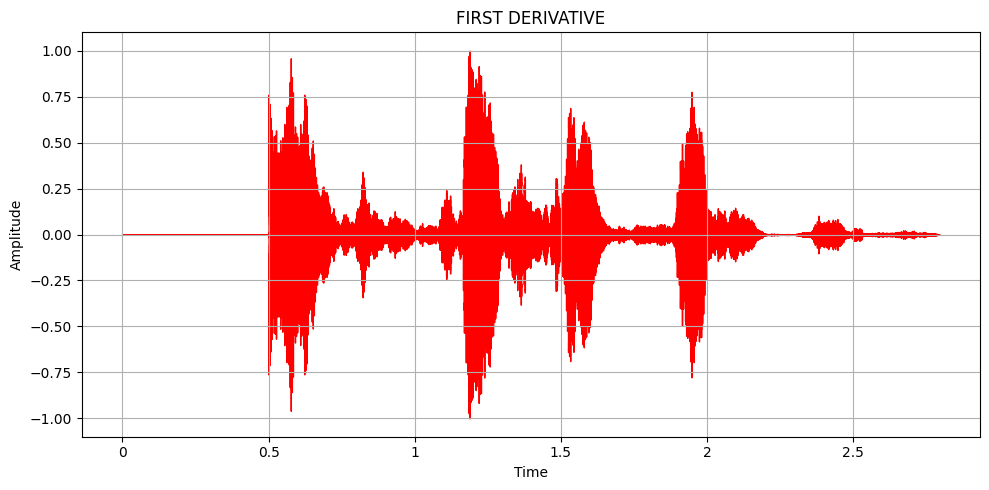

In [2]:
#A1
# Load audio file
audio_signal, sample_rate = librosa.load(r"E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab 1\Recording (4).wav")

# Compute first derivative of the audio signal
first_derivative = np.diff(audio_signal)
first_derivative /= np.max(np.abs(first_derivative))  # Normalize

print("Playing First Derivative Signal:")

# Plotting the first derivative
plt.figure(figsize=(10, 5))
librosa.display.waveshow(first_derivative, sr=sample_rate, color='red')
plt.title('FIRST DERIVATIVE')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Play the first derivative of the audio signal
ipd.Audio(first_derivative, rate=sample_rate)

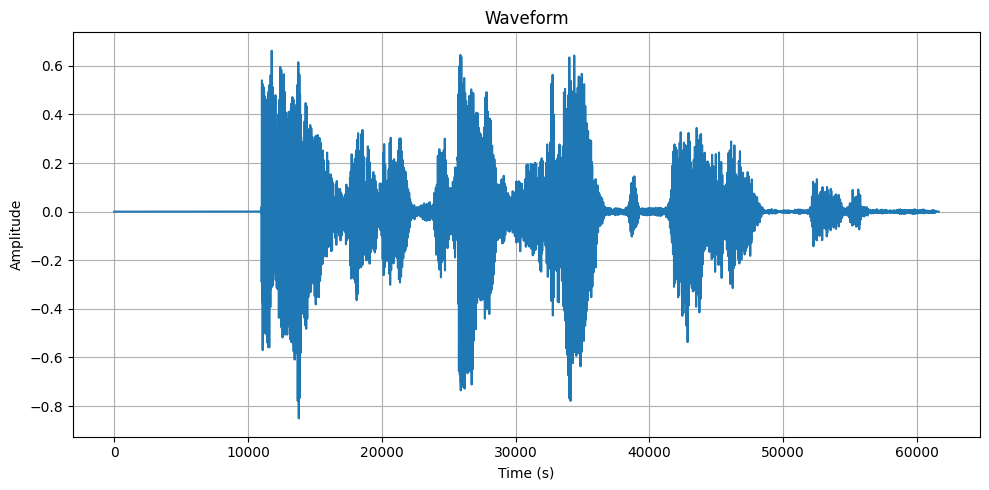

In [3]:
# Plotting the waveform
plt.figure(figsize=(10, 5))
plt.plot(audio_signal)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Playing back the audio
ipd.Audio(audio_signal, rate=sample_rate)

d:\Python\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Python\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Anjali\AppData\Local\Temp\ipykernel_12652\3182244159.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
C:\Users\Anjali\AppData\Local\Temp\ipykernel_12652\3182244159.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence interva

Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 4.080238568588469


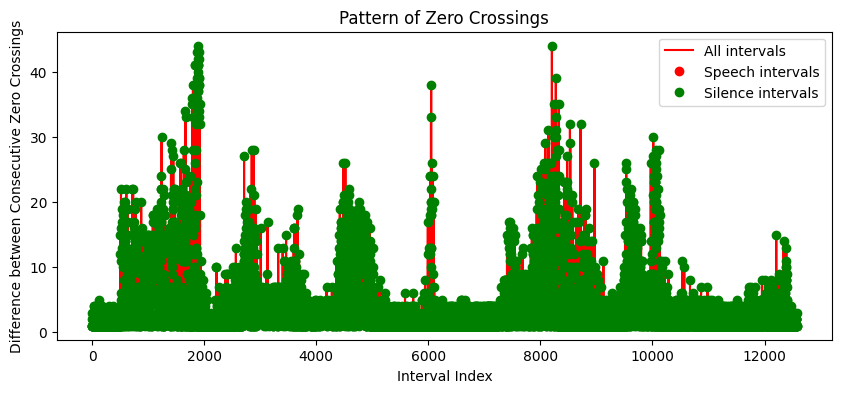

In [4]:
#A2
zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
zero_crossing_diffs = np.diff(zero_crossings)
threshold = 1000

# Distinguish between speech and silence based on the threshold
speech_intervals = zero_crossing_diffs[zero_crossing_diffs > threshold]
silence_intervals = zero_crossing_diffs[zero_crossing_diffs <= threshold]

# Calculate average lengths
avg_speech_interval_length = np.mean(speech_intervals)
avg_silence_interval_length = np.mean(silence_intervals)

# Print average lengths
print("Average length between consecutive zero crossings in speech regions:", avg_speech_interval_length)
print("Average length between consecutive zero crossings in silence regions:", avg_silence_interval_length)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(zero_crossing_diffs, label='All intervals', color='red')
plt.plot(np.arange(len(speech_intervals)), speech_intervals, 'ro', label='Speech intervals', color='red')
plt.plot(np.arange(len(speech_intervals), len(speech_intervals) + len(silence_intervals)), silence_intervals, 'bo', label='Silence intervals', color='green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Interval Index')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

The length Duration of first audio file: 1.3866666666666667 seconds
The length Duration of Second audio file: 2.0900226757369613 seconds


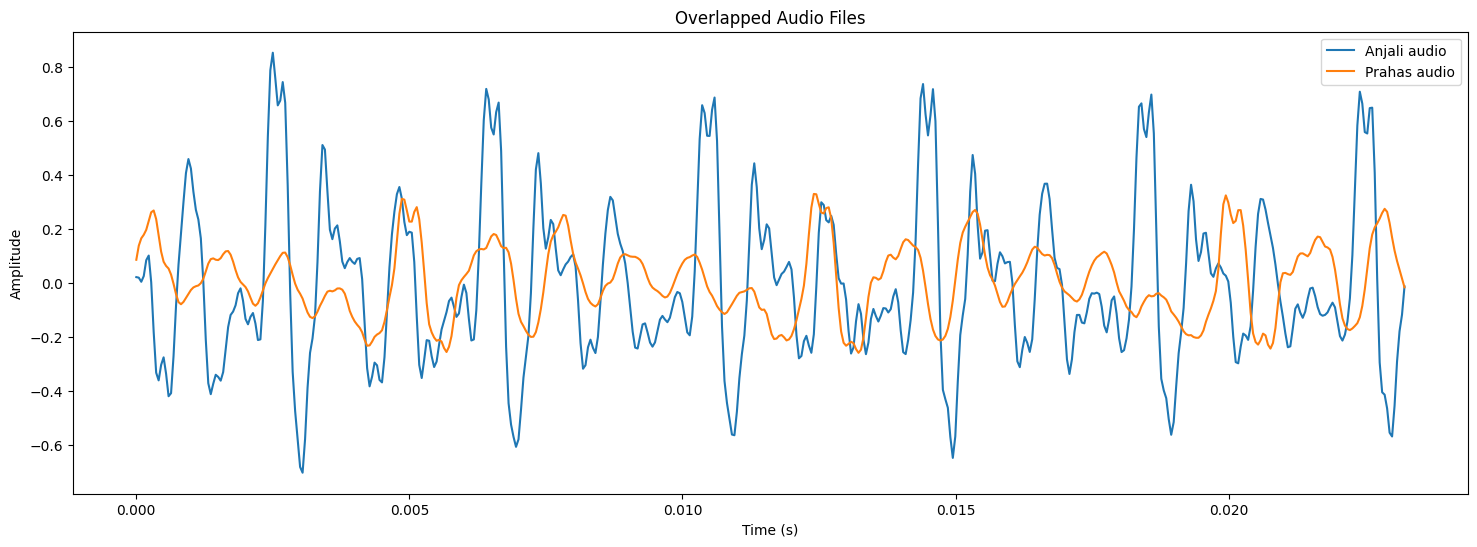

In [5]:
#A3
import librosa
import librosa.display


audio_file1 = r"E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab2\my_audio_a1.wav"
audio_file2 = r"E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab2\p1.wav"


# Load audio signals
y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
audio_trimmed1 = remove_silence(y1, sr1)
audio_trimmed2 = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(audio_trimmed1) / sr1, len(audio_trimmed1))
time2 = np.linspace(0, len(audio_trimmed2) / sr2, len(audio_trimmed2))

# Plot the trimmed audio files
plt.figure(figsize=(18, 6))
plt.plot(time1, audio_trimmed1, label='Anjali audio')
plt.plot(time2, audio_trimmed2, label='Prahas audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

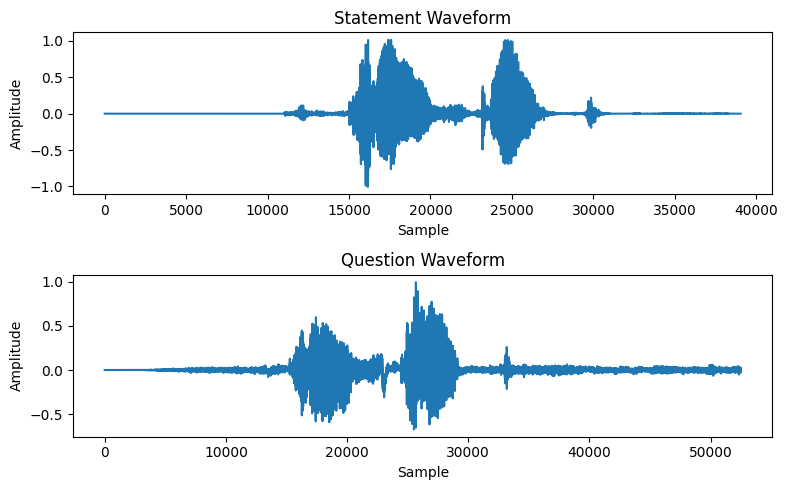

In [6]:
#A4
import librosa
import matplotlib.pyplot as plt

file_1 = r'E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab2\my_audio_a2.wav'
file_2 = r'E:\3rd Year\6th Sem\AI in Speech Processing\Labs\Lab2\p2.wav'

# Load audio signals
statement_signal, sr_statement = librosa.load(file_1)
question_signal, sr_question = librosa.load(file_2)

plt.figure(figsize=(8,5))

# Plot waveforms
plt.subplot(2, 1, 1)
plt.plot(statement_signal)
plt.title('Statement Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(question_signal)
plt.title('Question Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
